In [1]:
import sys
sys.path.insert(0, '../')

import utils
from JR_Scripts import dict_reader, time_toy_generator
from model import WGanModel, WNGanModel, TemporalGanModelv3
from gan import GAN
import tensorflow as tf
import numpy as np
from PIL import Image
import imageio
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

/home/jonathan/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
param_paths = "/home/jonathan/Documents/Master_Thesis/NNParams/Toy/paths_leo.txt"
params = dict_reader.read_gan_dict(param_paths)

In [3]:
print("Image size: {}".format(params['image_size']))
print("Model name {}".format(params['name']))
print("Model idx {}".format(params['model_idx']))

Image size: [128, 128]
Model name TWGAN_TS8s_gp50
Model idx 2


In [4]:
print("Discriminator Params")
print(params['discriminator'])
print("\nGenerator Params")
print(params['generator'])
print("\nOptimization Params")
print(params['optimization'])
print("\nCosmo Params")
print(params['cosmology'])

Discriminator Params
{'stride': [2, 2, 2, 2, 2, 1], 'nfilter': [16, 32, 64, 128, 256, 64], 'shape': [[5, 5], [5, 5], [5, 5], [5, 5], [5, 5], [3, 3]], 'batch_norm': [False, False, False, False, False, False], 'full': [32], 'summary': True}

Generator Params
{'stride': [2, 2, 2, 2, 2, 1], 'latent_dim': 25, 'nfilter': [64, 256, 128, 64, 32, 1], 'shape': [[5, 5], [5, 5], [5, 5], [5, 5], [5, 5], [3, 3]], 'batch_norm': [False, False, False, False, False], 'full': [1024], 'summary': False, 'non_lin': 'tanh'}

Optimization Params
{'gamma_gp': 50, 'batch_size': 8, 'weight_l2': 0.1, 'disc_optimizer': 'rmsprop', 'gen_optimizer': 'rmsprop', 'disc_learning_rate': 3e-05, 'gen_learning_rate': 3e-05, 'beta1': 0.5, 'beta2': 0.99, 'epsilon': 1e-08, 'epoch': 150}

Cosmo Params
{'clip_max_real': False, 'k': 1, 'log_clip': 0.1, 'Npsd': 500, 'sigma_smooth': 1.0}


In [5]:
num_gaussians = 42
if 'num_gaussians' in params:
    num_gaussians = params['num_gaussians']

# Generate data
data = time_toy_generator.gen_dataset(images_per_time_step=100,
                                      width=params['image_size'][0],
                                      num_gaussians=num_gaussians,
                                      point_density_factor=3)
if params['num_classes'] == 8:
    data = np.asarray([data[2], data[3], data[4], data[5], data[6], data[7], data[8], data[9]])
if params['num_classes'] == 5:
    data = np.asarray([data[1], data[3], data[5], data[7], data[9]])
if params['num_classes'] == 4:
    data = np.asarray([data[0], data[3], data[6], data[9]])
if params['num_classes'] == 2:
    data = np.asarray([data[5], data[9]])
if params['num_classes'] == 1:
    data = np.asarray([data[9]])

# Prep data
data = data.swapaxes(0,1)
data = data.reshape((data.shape[0] * data.shape[1], data.shape[2], data.shape[3]))
data = data.astype(np.float32)
data = utils.forward_map(data, params['cosmology']['k'])
data = data / 1.02

completed 5 image series
completed 10 image series
completed 15 image series
completed 20 image series
completed 25 image series
completed 30 image series
completed 35 image series
completed 40 image series
completed 45 image series
completed 50 image series
completed 55 image series
completed 60 image series
completed 65 image series
completed 70 image series
completed 75 image series
completed 80 image series
completed 85 image series
completed 90 image series
completed 95 image series
completed 100 image series


In [6]:
# Initialize model
if params['model_idx'] == 0:
    model = WGanModel
if params['model_idx'] == 1:
    model = WNGanModel
if params['model_idx'] == 2:
    model = TemporalGanModelv3

In [7]:
gan = GAN(params, model)
gan._sess = tf.Session()
leo_results = "/home/jonathan/Documents/Master_Thesis/LeoResults/"
folder = "models_M23/TWGAN_TS8_gp50_2018_3_21_16_13_checkpoints/"
specific_model = "TWGAN_TS8_gp50-96000"
gan._load(leo_results + folder + specific_model)

Generator 
------------------------------------------------------------
     The input is of size (?, 25)
     0 Full layer with 1024 outputs
         Size of the variables: (?, 1024)
     Reshape to (?, 4, 4, 64)
     1 Deconv layer with 64 channels
         Size of the variables: (?, 8, 8, 64)
     2 Deconv layer with 256 channels
         Size of the variables: (?, 16, 16, 256)
     3 Deconv layer with 128 channels
         Size of the variables: (?, 32, 32, 128)
     4 Deconv layer with 64 channels
         Size of the variables: (?, 64, 64, 64)
     5 Deconv layer with 32 channels
         Size of the variables: (?, 128, 128, 32)
     6 Deconv layer with 1 channels
         Size of the variables: (?, 128, 128, 1)
    Non lienarity: tanh
     The output is of size (?, 128, 128, 1)
------------------------------------------------------------

Discriminator 
------------------------------------------------------------
     The input is of size (1, 128, 128, 8)
     0 Conv layer with 

/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gradients_impl.py:96: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


---------
Variables: name (type shape) [size]
---------
generator/0_full/Matrix:0 (float32_ref 25x1024) [25600, bytes: 102400]
generator/0_full/bias:0 (float32_ref 1024) [1024, bytes: 4096]
generator/0_deconv/w:0 (float32_ref 5x5x64x64) [102400, bytes: 409600]
generator/0_deconv/biases:0 (float32_ref 64) [64, bytes: 256]
generator/1_deconv/w:0 (float32_ref 5x5x256x64) [409600, bytes: 1638400]
generator/1_deconv/biases:0 (float32_ref 256) [256, bytes: 1024]
generator/2_deconv/w:0 (float32_ref 5x5x128x256) [819200, bytes: 3276800]
generator/2_deconv/biases:0 (float32_ref 128) [128, bytes: 512]
generator/3_deconv/w:0 (float32_ref 5x5x64x128) [204800, bytes: 819200]
generator/3_deconv/biases:0 (float32_ref 64) [64, bytes: 256]
generator/4_deconv/w:0 (float32_ref 5x5x32x64) [51200, bytes: 204800]
generator/4_deconv/biases:0 (float32_ref 32) [32, bytes: 128]
generator/5_deconv/w:0 (float32_ref 3x3x1x32) [288, bytes: 1152]
generator/5_deconv/biases:0 (float32_ref 1) [1, bytes: 4]
discriminato

True

In [8]:
def gen_images_and_add_to_list(lst, width = 128):
    z = gan._sample_latent(1)
    first = 1.0 / params['num_classes']
    frames = (np.arange(params['num_classes']) + 1) / params['num_classes']
    for idx in frames:
        y = np.asarray([[idx]])
        g_fake = gan._sess.run([gan._G_fake], feed_dict={gan._z:z, gan._model.y:y})[0]
        img = np.reshape(g_fake, (width, width))
        lst.append(img)

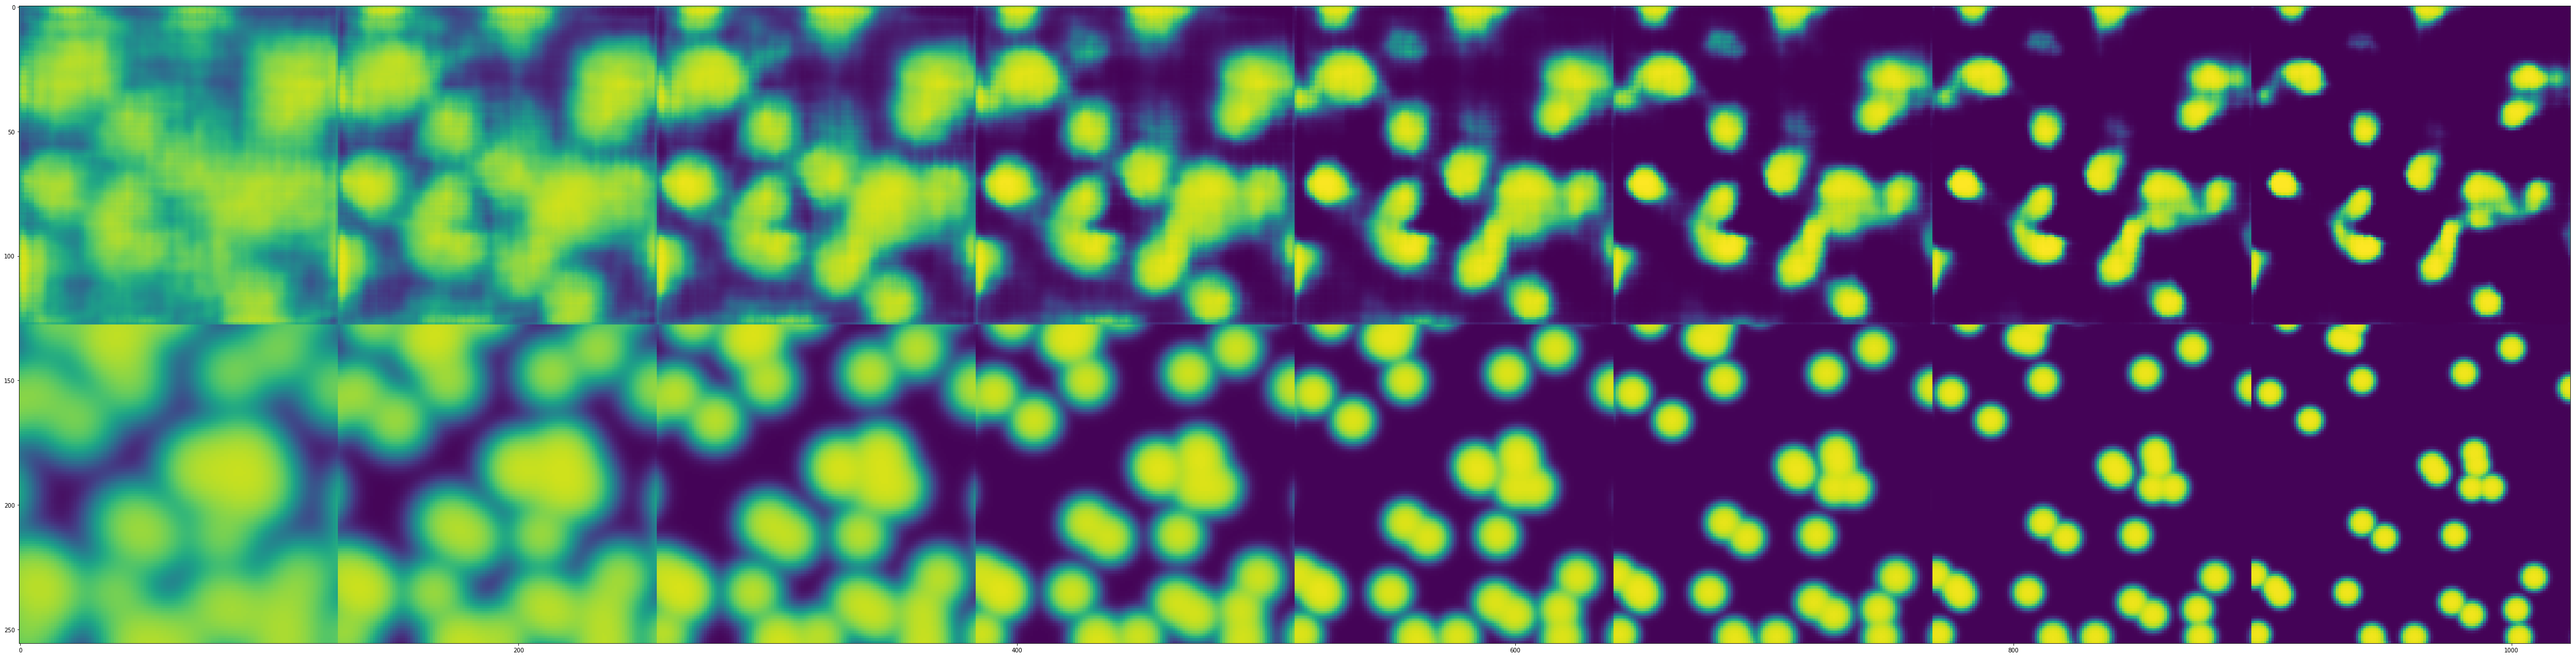

In [9]:
images = []
width = params["image_size"][0]
gen_images_and_add_to_list(images, width = width)
fig, ax = plt.subplots(figsize=(128, 16))
ax.imshow(np.vstack([np.hstack(images), np.hstack(data[0:8])]), interpolation=None)
plt.tight_layout()
for i in range(100):
    gen_images_and_add_to_list(images, width = width)

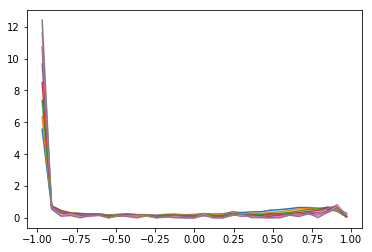

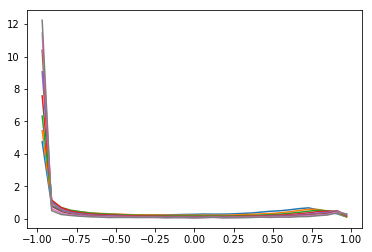

In [18]:
_, bins = np.histogram(np.vstack((data, images)), bins='doane')
a = (bins[1:] + bins[:-1]) / 2
plt.figure()
for i in range(8):
    hist_r,_ = np.histogram(data[i:8:], density=True, bins=bins)
    plt.plot(a, hist_r, '-')
plt.figure()
for i in range(8):
    hist_f,_ = np.histogram(images[i:8:], density=True, bins=bins)
    plt.plot(a, hist_f, '-')

t0 Log L2 Norm: 0.6569686459322637
t1 Log L2 Norm: 0.7919522074905848
t2 Log L2 Norm: 0.8891457540368888
t3 Log L2 Norm: 0.7870659113150374
t4 Log L2 Norm: 0.5536726799013324
t5 Log L2 Norm: 0.35889003497862315
t6 Log L2 Norm: 0.3470062644794225
t7 Log L2 Norm: 0.29402793386174414


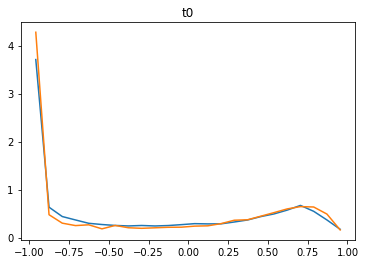

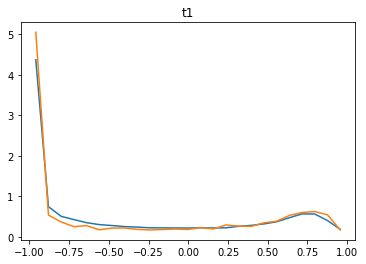

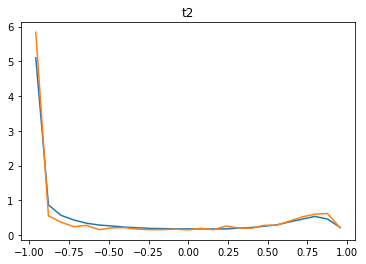

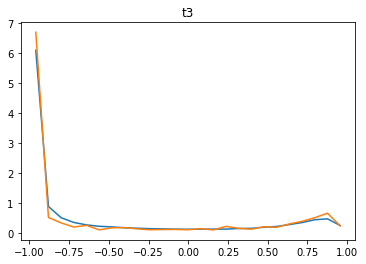

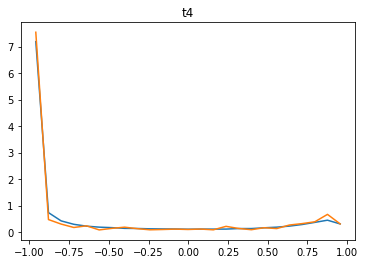

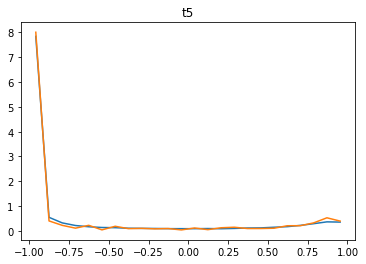

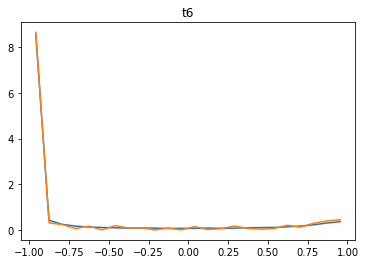

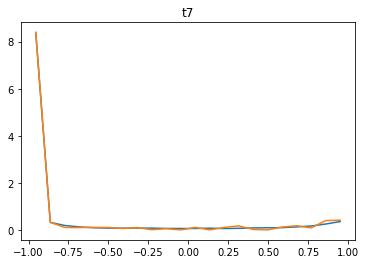

In [25]:
for t in range(8):
    plt.figure()
    hist_f, bins = np.histogram(images[t:8:], density=True, bins='doane')
    hist_r, _ = np.histogram(data[t:8:], density=True, bins=bins)
    x = (bins[1:] + bins[:-1]) / 2
    plt.plot(x, hist_f, '-', label="fake")
    plt.plot(x, hist_r, '-', label="real")
    print("t{} Log L2 Norm: {}".format(t, np.linalg.norm(hist_r-hist_f)))
    plt.title("t{}".format(t))

<Figure size 432x288 with 0 Axes>

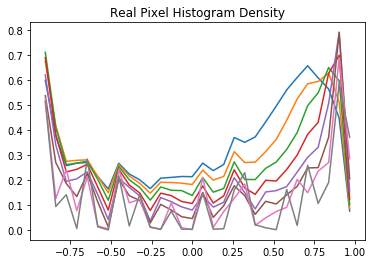

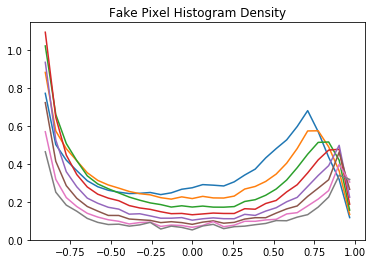

<Figure size 432x288 with 0 Axes>

In [24]:
_, bins = np.histogram(images, bins='doane')
a = (bins[1:] + bins[:-1]) / 2
for i in range(8):
    hist_r,_ = np.histogram(data[i:8:], density=True, bins=bins)
    plt.plot(a[1:], hist_r[1:], '-')
plt.title("Real Pixel Histogram Density")
plt.figure()
for i in range(8):
    hist_f,_ = np.histogram(images[i:8:], density=True, bins=bins)
    plt.plot(a[1:], hist_f[1:], '-')
plt.title("Fake Pixel Histogram Density")
plt.figure()

t0 Log L2 Norm: 0.3284427035678293
t1 Log L2 Norm: 0.40616862303102186
t2 Log L2 Norm: 0.4976306699062291
t3 Log L2 Norm: 0.5067562191313969
t4 Log L2 Norm: 0.42522310827694515
t5 Log L2 Norm: 0.31799163645291667
t6 Log L2 Norm: 0.3326649340293123
t7 Log L2 Norm: 0.2919386354833644


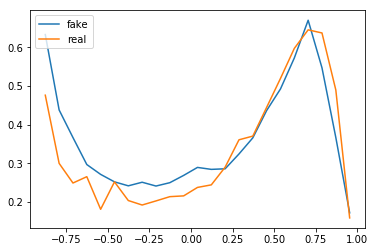

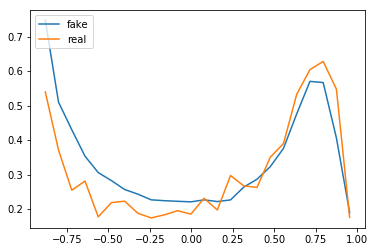

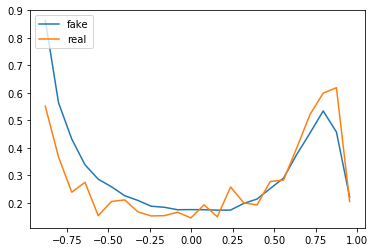

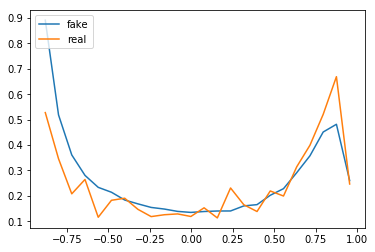

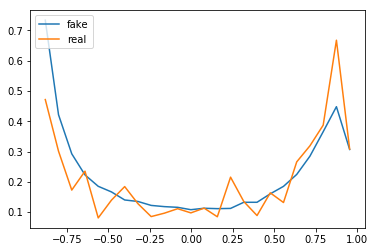

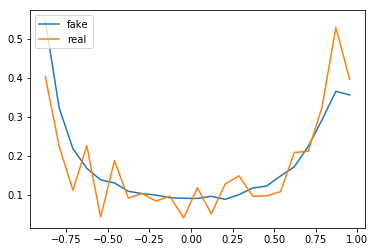

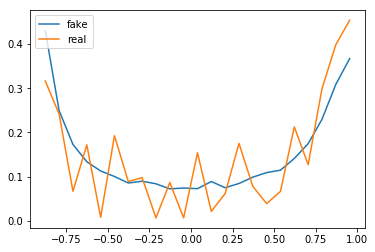

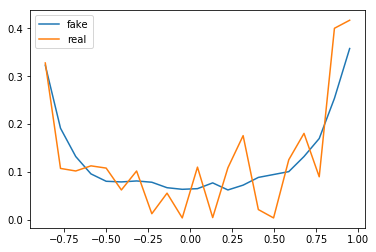

In [22]:
for t in range(8):
    plt.figure()
    hist_f, bins = np.histogram(images[t:8:], density=True, bins='doane')
    hist_r, _ = np.histogram(data[t:8:], density=True, bins=bins)
    x = (bins[1:] + bins[:-1]) / 2
    plt.plot(x[1:], hist_f[1:], '-', label="fake")
    plt.plot(x[1:], hist_r[1:], '-', label="real")
    plt.legend(loc=2)
    print("t{} Log L2 Norm: {}".format(t, np.linalg.norm(hist_r[1:]-hist_f[1:])))

# Temporal Comparison

In [29]:
diffs_r = data[1:] - data[:-1]
data_f = np.asarray(images)
diffs_f = data_f[1:] - data_f[:-1]

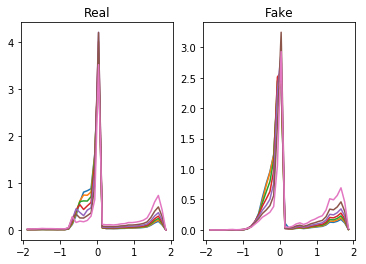

In [32]:
_, bins = np.histogram(np.vstack((diffs_r, diffs_f)), bins='doane')
a = (bins[1:] + bins[:-1]) / 2
plt.subplot(1,2,1)
plt.title("Real")
for i in range(8-1):
    hist_dr = np.histogram(diffs_r[i:8:], density=True, bins=bins)
    plt.plot(a, hist_dr[0], '-')
plt.subplot(1,2,2)
plt.title("Fake")
for i in range(8-1):
    hist_df = np.histogram(diffs_f[i:8:], density=True, bins=bins)
    plt.plot(a, hist_df[0], '-')

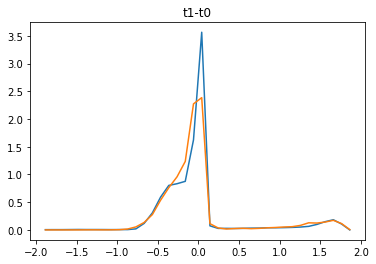

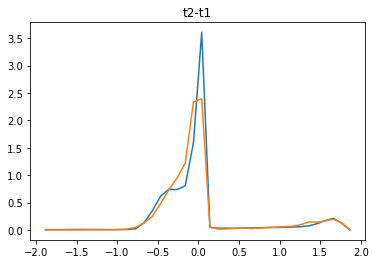

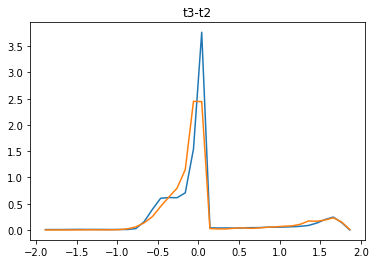

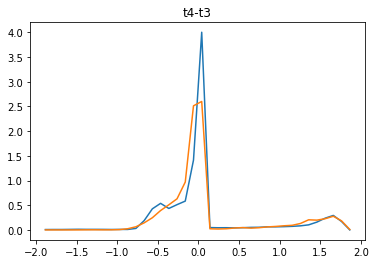

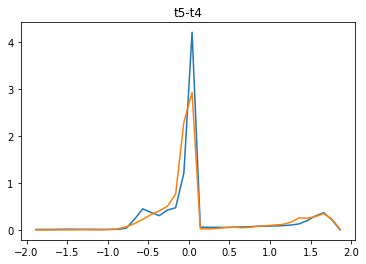

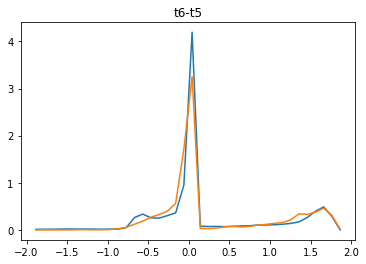

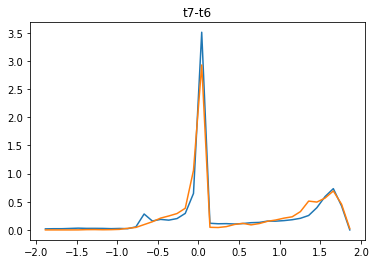

In [34]:
for t in range(8-1):
    plt.figure()
    plt.title("t{}-t{}".format(t+1, t))
    hist_dr, _ = np.histogram(diffs_r[t:8:], density=True, bins=bins)
    hist_df, _ = np.histogram(diffs_f[t:8:], density=True, bins=bins)
    x = (bins[1:] + bins[:-1]) / 2
    plt.plot(x, hist_dr, '-', label="real")
    plt.plot(x, hist_df, '-', label="fake")